In [50]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.17.0'

In [51]:
(X_train, y_train) , (_,_) = tf.keras.datasets.mnist.load_data()

In [52]:
#60,000 samples each 28 by 28 pixels 28*28 = 784 pixels are in each image
X_train.shape

(60000, 28, 28)

In [53]:
y_train.shape

(60000,)

3526
8


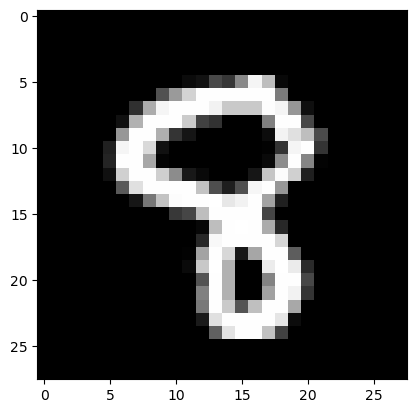

In [67]:
#randomly print y , position in the sample dataset and which digit
i = np.random.randint(0,60000)
print(i)
print(y_train[i])
#visualize the image
plt.imshow(X_train[i], cmap= 'gray')

In [57]:
#make 4d to compatible with keras train
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [9]:
#normalize the pixels
X_train = (X_train - 127.5) / 127.5

In [10]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [11]:
buffer_size = 60000
batch_size = 256

In [12]:
#mini batch gradient descent
# each batch will send to the gradient descent 256 images and then the wights will be adjusted
buffer_size / batch_size

234.375

In [13]:
type(X_train)

numpy.ndarray

In [14]:
#the training dataset is in numpy format
# we need to convert in to tensorflow format to train the neural network
# train the network with batch of 234 images 
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [15]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

# Building the generator

In [16]:
def build_generator():
    network = tf.keras.Sequential()
    
    # 7*7*256 units of neurons will be used in the neural network input layer
    #we will not use bias because we are not training network to classify
    # input_shape = 100 means 100 neurons will connect to the input layer as random variable input with 7*7*256 neurons
    # in this way 100 random numbers will be input to the network
    #explicitly define the input layer shape to avoid **kwargs error
    network.add(layers.Input(shape=(100,)))
    network.add(layers.Dense(units = 7*7*256, use_bias = False, ))
    #batchnormalization will apply normalization in the layers also
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())
    network.add(layers.Reshape((7,7,256)))
    
    #hidden layers
    network.add(layers.Conv2DTranspose(filters = 128, kernel_size = (5,5), padding = 'same', use_bias = False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())
    
    # upsample layer 14*14*64
    network.add(layers.Conv2DTranspose(filters = 64, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias = False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())    
    
    #28*28*1
    # as we have normalized the pixels in [-1,1] we can not use sigmoid, so used tanh
    network.add(layers.Conv2DTranspose(filters = 1, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias = True, activation = 'tanh'))
    network.summary()
    return network

In [17]:
generator = build_generator()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │         1,601 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,945 (8.89 MB)

 Trainable params: 2,305,473 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [18]:
noise = tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-1.31816149e-01,  4.10087347e-01, -5.90301216e-01,
         2.92760313e-01,  5.86665682e-02,  1.15874612e+00,
         1.13733304e+00,  6.41618073e-01,  1.34100661e-01,
         5.37105560e-01, -2.67549014e+00,  1.92512643e+00,
        -1.95691958e-01, -3.19493413e-01, -1.74943161e+00,
        -1.22929132e+00, -7.10449100e-01,  3.14883351e-01,
        -1.50070265e-01, -5.74123263e-01,  1.62489414e-01,
         4.14943486e-01,  1.09076524e+00, -1.01996207e+00,
        -4.81889218e-01,  3.55171114e-01,  1.70125142e-02,
         2.91940260e+00,  2.07804346e+00, -6.68684065e-01,
        -6.92587614e-01, -6.12331808e-01,  8.80419239e-02,
        -4.93227094e-01, -6.90859258e-01, -1.20273221e-03,
        -8.51524472e-01,  3.58088762e-01,  1.97869986e-02,
        -1.36918068e+00,  7.83244908e-01, -1.54469240e+00,
        -2.49813423e-01,  1.94371164e+00,  5.30278347e-02,
        -2.87419295e+00,  1.65416455e+00, -1.18574165e-02,
      

In [19]:
generator.layers[0].input

<KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor>

In [20]:
generated_image = generator(noise, training = False)

In [21]:
# 1 image with 28*28 size and color channel =1
generated_image.shape

TensorShape([1, 28, 28, 1])

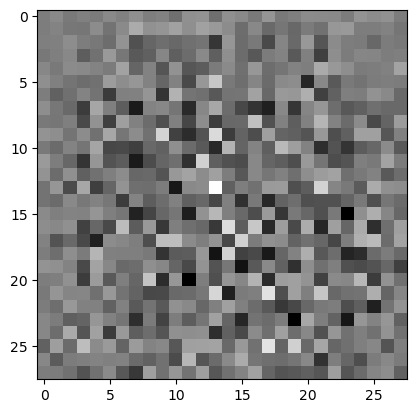

In [22]:
#we will manually access the shape to avoid error
plt.imshow(generated_image[0, :, :, 0], cmap = 'gray')

# Building the Discriminator


In [23]:
def build_discriminator():
    network = tf.keras.Sequential()
    
    # 14*14*64
    network.add(layers.Input(shape=[28,28,1]))
    network.add(layers.Conv2D(filters = 64, strides = (2,2), kernel_size = (5,5), padding = 'same'))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))
    
    # 7*7*128
    network.add(layers.Conv2D(filters = 128, strides = (2,2), kernel_size = (5,5), padding = 'same'))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3)) 
    
    #convert to vector 
    network.add(layers.Flatten())
    network.add(layers.Dense(1))
    network.summary()
    return network

    

In [24]:
discriminator = build_discriminator()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
discriminator.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_67>

In [26]:
discriminator(generated_image, training = False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00062583]], dtype=float32)>

In [27]:
tf.sigmoid(-0.00093546)

<tf.Tensor: shape=(), dtype=float32, numpy=0.49976614>

# Loss Calculation

In [28]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [29]:
#generates tensorflow type output
#1 for real images and 0 for fake images
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [30]:
def discriminator_loss(expected_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [31]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [32]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

# Training the GAN

In [33]:
epochs = 100
noise_dimension = 100
number_of_images = 16

In [34]:
batch_size, noise_dimension

(256, 100)

In [35]:
@tf.function
def train(images):
    noise = tf.random.normal([batch_size, noise_dimension])
    #print(noise.shape)
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training = True)
        
        expected_output = discriminator(images, training = True)
        fake_output = discriminator(generated_images, training = True)
        
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(expected_output, fake_output)
    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

In [36]:
test_images = tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [37]:
def train_gan(dataset, epochs, test_images):
    for epoch in range(epochs):
        #print(epoch)
        for image_batch in dataset:
            #print(image_batch.shape)
            train(image_batch)
    print('Epoch: ', epoch +1)
    generated_images = generator(test_images, training = False)
    fig = plt.figure(figsize = (10,10))
    for i in range(generated_images.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap = 'gray')
        plt.axis('off')
    plt.show()

Epoch:  100


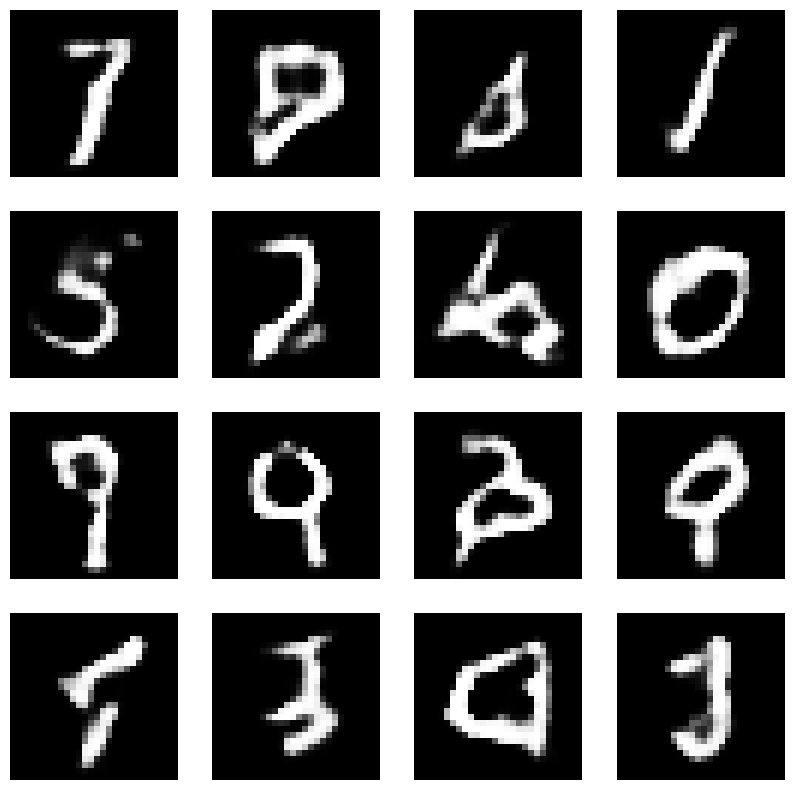

In [38]:
train_gan(X_train, epochs, test_images)

In [46]:
def save_models(generator, discriminator, path_generator='dc_gan_mnist_generator_model.keras', path_discriminator='dc_gan_mnist_discriminator_model.keras'):

    # Save the generator model
    generator.save(path_generator)
    print(f"Generator model saved at {path_generator}")
    
    # Save the discriminator model
    discriminator.save(path_discriminator)
    print(f"Discriminator model saved at {path_discriminator}")

# Example usage: After training, save the models
save_models(generator, discriminator, path_generator='dc_gan_mnist_generator_final.keras', path_discriminator='dc_gan_mnist_discriminator_final.keras')


Generator model saved at dc_gan_mnist_generator_final.keras
Discriminator model saved at dc_gan_mnist_discriminator_final.keras
